In [1]:
import os

# Remplace par le chemin vers le dossier où les données sont stockées
data_path = 'C:/Users/Amina/Desktop/cours/projet/objectif2'
files = os.listdir(data_path)

# Afficher la liste des fichiers
for file in files:
    print(file)


Arterial_side
Vein_side


In [2]:
import os

# Chemin vers ton dossier contenant les sous-dossiers avec les fichiers audio
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2'

# Liste tous les fichiers audio dans les sous-dossiers
audio_files = []
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):  # Modifie l'extension si nécessaire (.mp3, .flac, etc.)
            audio_files.append(os.path.join(subdir, file))

# Afficher les chemins des fichiers audio
print(audio_files)


['C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190923_071811.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190924_051500.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190925_060006.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190926_053529.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190927_045841.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190928_053352.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190929_055434.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20190930_044709.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20191002_045333.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20191003_052306.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\20191004_045209.wav', 'C:/Users/Amina/Desktop/cours/projet/objectif2\\Arterial_side\\2

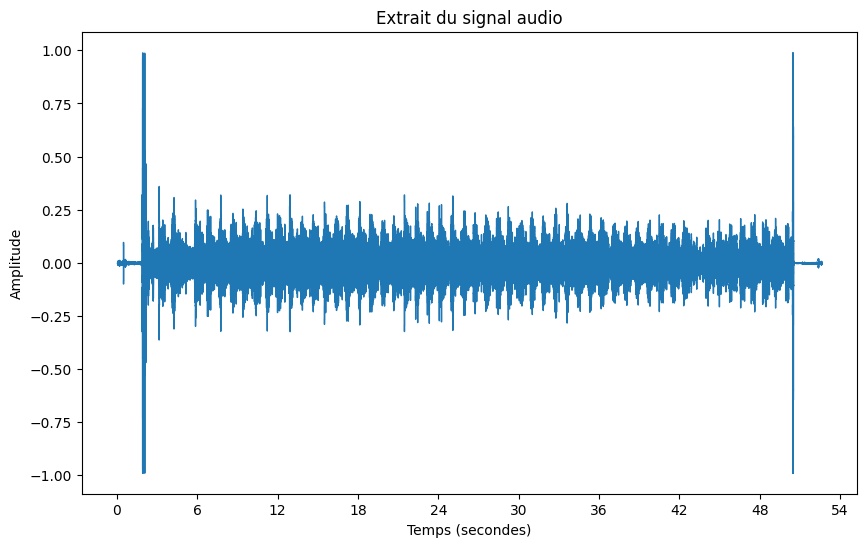

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Remplace par le chemin du fichier audio
audio_file = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Vein_side/20190929_055829.wav'

# Charger le fichier audio
y, sr = librosa.load(audio_file, sr=None)

# Afficher un extrait du signal audio
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Extrait du signal audio')
plt.xlabel('Temps (secondes)')
plt.ylabel('Amplitude')
plt.show()


In [4]:
# Après chaque graphique, ferme la figure
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', y_axis='mel', sr=sr)
plt.title(f'MFCCs - {audio_file}')
plt.colorbar(format='%+2.0f dB')
plt.show()
plt.close()  # Ferme la figure après l'affichage

plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_delta, x_axis='time', y_axis='mel', sr=sr)
plt.title(f'Dérivée des MFCCs - {audio_file}')
plt.colorbar(format='%+2.0f dB')
plt.show()
plt.close()  # Ferme la figure après l'affichage


NameError: name 'mfccs' is not defined

<Figure size 1000x600 with 0 Axes>

In [6]:
import librosa
import numpy as np
import os
import csv

# Fonction pour extraire les MFCCs et leurs dérivées
def extract_features(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        mfcc_delta = librosa.feature.delta(mfccs)  # Extraire les dérivées des MFCCs
        
        # Retourner la moyenne des MFCCs et de leurs dérivées (une seule valeur par fichier)
        return np.mean(mfccs, axis=1), np.mean(mfcc_delta, axis=1)
    except Exception as e:
        print(f"Erreur lors du traitement du fichier {audio_file}: {e}")
        return None, None

# Dossier racine contenant les sous-dossiers pour chaque classe
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2'  # Remplace ce chemin par ton chemin réel

# Liste pour stocker les caractéristiques et étiquettes
features = []
labels = []

# Liste des fichiers audio traités
audio_files = []

# Parcourir les sous-dossiers dans 'objectif2' (les sous-dossiers sont les classes)
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            # Construire le chemin complet vers le fichier audio
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            
            # Extraire les MFCCs
            mfccs, mfcc_delta = extract_features(audio_file)
            
            # Vérification de l'extraction des MFCCs
            if mfccs is None or mfcc_delta is None:
                print(f"Erreur d'extraction des MFCCs pour {audio_file}. Ce fichier sera ignoré.")
                continue
            
            # Vérification du sous-dossier pour l'étiquetage
            print(f"Sous-dossier pour {audio_file}: {subdir}")

            # Ajouter les MFCCs à la liste des caractéristiques
            features.append(np.concatenate((mfccs, mfcc_delta)))
            
            # Ajouter le nom du sous-dossier dans la liste des labels (étiquettes)
            folder_name = os.path.basename(subdir)  # Récupérer le nom du sous-dossier
            labels.append(folder_name)  # Utiliser le nom du sous-dossier comme étiquette

# Vérification du nombre de fichiers traités et des caractéristiques extraites
print(f"Nombre de fichiers audio traités : {len(audio_files)}")
print(f"Nombre de caractéristiques extraites : {len(features)}")

# Si aucune caractéristique n'a été extraite, afficher un message d'avertissement
if len(features) == 0:
    print("Aucune caractéristique extraite. Vérifie les fichiers audio et l'extraction des MFCCs.")
else:
    # Convertir les listes en tableaux Numpy
    X = np.array(features)  # MFCCs et leurs dérivées
    y = np.array(labels)  # Étiquettes (nom des sous-dossiers)

    # Vérification de la taille des données extraites
    print(f"Dimensions des MFCCs : {X.shape}")

    # Sauvegarder les caractéristiques et les étiquettes dans un fichier CSV
    csv_file = 'mfcc_features_labels.csv'
    with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Écrire l'en-tête avec les noms des MFCCs et des dérivées
        writer.writerow(['audio_file', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'mfcc_delta_1', 'mfcc_delta_2', 'mfcc_delta_3', 'mfcc_delta_4', 'mfcc_delta_5', 'mfcc_delta_6', 'mfcc_delta_7', 'mfcc_delta_8', 'mfcc_delta_9', 'mfcc_delta_10', 'mfcc_delta_11', 'mfcc_delta_12', 'mfcc_delta_13', 'label'])

        # Écrire les caractéristiques et les étiquettes dans le fichier CSV
        for idx, audio_file in enumerate(audio_files):
            if idx < len(X):  # Assurer que X et y ont bien la même longueur
                writer.writerow([audio_file] + list(X[idx]) + [y[idx]])

    print(f"MFCCs enregistrés dans le fichier {csv_file}")


Sous-dossier pour C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side\20190923_071811.wav: C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side
Sous-dossier pour C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side\20190924_051500.wav: C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side
Sous-dossier pour C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side\20190925_060006.wav: C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side
Sous-dossier pour C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side\20190926_053529.wav: C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side
Sous-dossier pour C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side\20190927_045841.wav: C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side
Sous-dossier pour C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side\20190928_053352.wav: C:/Users/Amina/Desktop/cours/projet/objectif2\Arterial_side
Sous-dossier pour C:/Users/Amina/Desktop/cours

In [10]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fonction pour extraire les MFCCs à partir d'un fichier audio
def extract_mfcc(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Charger l'audio
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        return np.mean(mfccs, axis=1)  # Retourner la moyenne des MFCCs
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Arterial_side'  # Remplace ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs MFCCs
audio_files = []
mfccs_list = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mfcc = extract_mfcc(audio_file)
            if mfcc is not None:
                mfccs_list.append(mfcc)

# Convertir les MFCCs extraits en un tableau numpy
X = np.array(mfccs_list)

print(f"Nombre de fichiers audio traités : {len(audio_files)}")
print(f"Dimensions des MFCCs : {X.shape}")


Nombre de fichiers audio traités : 277
Dimensions des MFCCs : (277, 13)


Nombre de fichiers audio traités : 277
Dimensions des MFCCs : (277, 13)


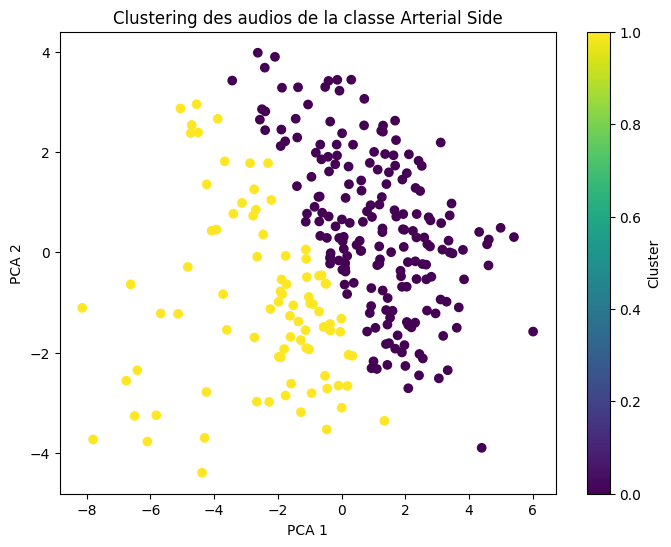

Centres des clusters : [[ 0.31305975  0.16987033  0.15917696 -0.12338384 -0.09883849  0.1976474
   0.38553542  0.29147676  0.36602834  0.33219928  0.39228094  0.43154404
   0.45209554]
 [-0.6769242  -0.32426423 -0.33823547  0.2504777   0.19407146 -0.48943895
  -0.8736507  -0.641516   -0.80195814 -0.7707847  -0.84590465 -0.9685021
  -1.009183  ]]


In [24]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fonction pour extraire les MFCCs à partir d'un fichier audio
def extract_mfcc(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Charger l'audio
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        return np.mean(mfccs, axis=1)  # Retourner la moyenne des MFCCs
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Arterial_side'  # Remplacer ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs MFCCs
audio_files = []
mfccs_list = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mfcc = extract_mfcc(audio_file)
            if mfcc is not None:
                mfccs_list.append(mfcc)

# Convertir les MFCCs extraits en un tableau numpy
X = np.array(mfccs_list)

# Vérification du nombre de fichiers audio traités
print(f"Nombre de fichiers audio traités : {len(audio_files)}")
print(f"Dimensions des MFCCs : {X.shape}")

# Normalisation des MFCCs avant d'appliquer le clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisation des MFCCs extraits

# Appliquer MiniBatch KMeans pour le clustering sur les MFCCs normalisés
kmeans = MiniBatchKMeans(n_clusters=2, random_state=42)  # 2 clusters (normal vs anomalie)
kmeans.fit(X_scaled)  # Clustering sur les MFCCs normalisés

# Prédire les clusters pour chaque fichier audio
labels_kmeans = kmeans.predict(X_scaled)

# Visualisation des clusters avec PCA (réduction de dimension)
pca = PCA(n_components=2)  # Réduction des dimensions à 2 pour la visualisation
encoded_X_pca = pca.fit_transform(X_scaled)

# Affichage des clusters
plt.figure(figsize=(8, 6))
plt.scatter(encoded_X_pca[:, 0], encoded_X_pca[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('Clustering des audios de la classe Arterial Side')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Affichage des centres des clusters
print(f"Centres des clusters : {kmeans.cluster_centers_}")


Moyenne des MFCCs pour le Cluster 0 : [0.23501846 0.02701815 0.22695847 0.02243715 0.04080681 0.25184613
 0.41194555 0.35519823 0.42553756 0.39794672 0.44468012 0.47974232
 0.4970474 ]


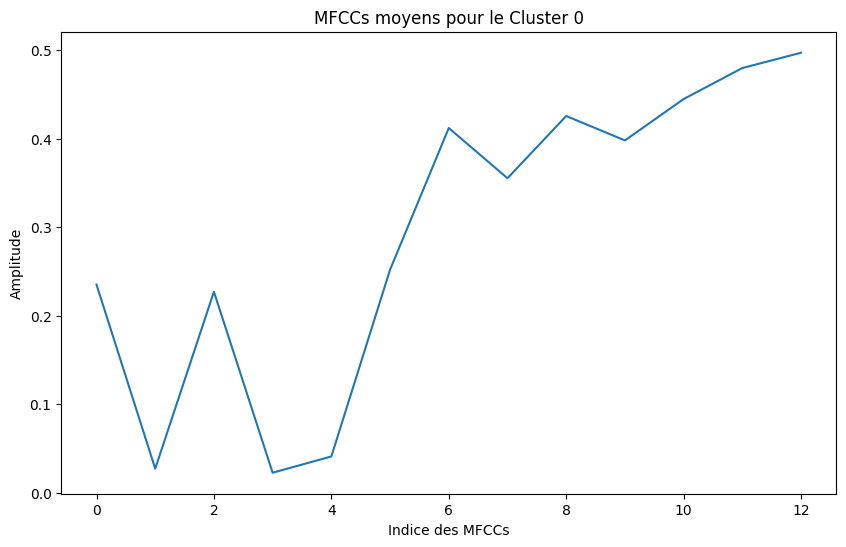

Moyenne des MFCCs pour le Cluster 1 : [-0.5219597  -0.0600055  -0.50405896 -0.04983134 -0.09062917 -0.55933285
 -0.91490245 -0.78887063 -0.9450891  -0.88381195 -0.9876031  -1.065474
 -1.1039073 ]


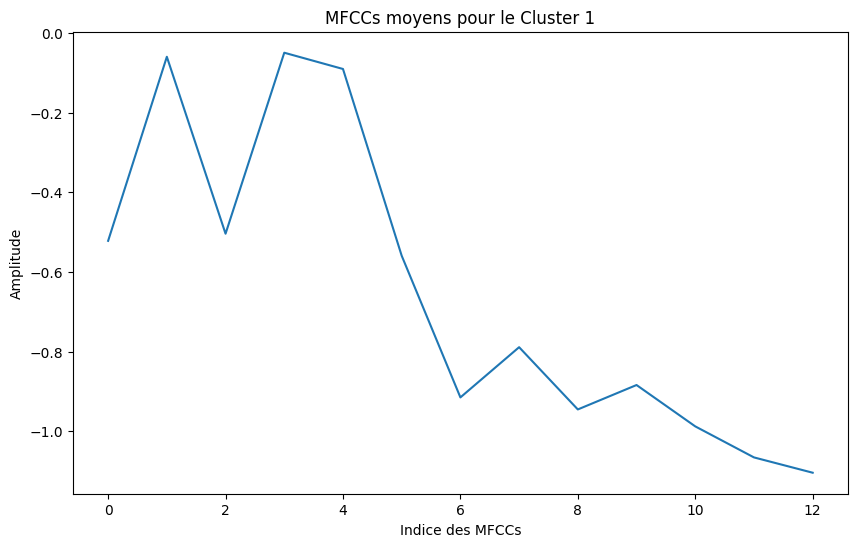

In [ ]:
# Calcul des MFCCs moyens pour chaque cluster
for i in range(2):  # On a deux clusters
    cluster_mfccs = X_scaled[labels_kmeans == i]  # Sélectionner les MFCCs du cluster i
    mean_mfcc = np.mean(cluster_mfccs, axis=0)  # Calculer la moyenne des MFCCs pour ce cluster
    print(f"Moyenne des MFCCs pour le Cluster {i} : {mean_mfcc}")
    
    # Afficher les MFCCs moyens pour chaque cluster
    plt.figure(figsize=(10, 6))
    plt.plot(mean_mfcc)
    plt.title(f"MFCCs moyens pour le Cluster {i}")
    plt.xlabel("Indice des MFCCs")
    plt.ylabel("Amplitude")
    plt.show()


En analysant les deux graphiques des MFCCs moyens pour les clusters, je peux donner mon avis basé sur les formes des courbes.

Le Cluster 0 (graphe avec une pente croissante) semble plus structuré et pourrait être le son normal dans l'artère. Les MFCCs dans ce cluster montrent une tendance plus lisse et régulière.

Le Cluster 1 (graphe avec des variations plus erratiques et moins régulières) pourrait indiquer un son anormal, ce qui pourrait être associé à une sténose. Les MFCCs dans ce cluster semblent avoir plus de variabilité, ce qui est souvent observé dans des conditions anormales (par exemple, en raison de turbulences dans le flux sanguin).

Conclusion :
**Cluster 0 pourrait être normal (flux sanguin sans anomalie).**

**Cluster 1 pourrait être associé à une anomalie (comme une sténose).**

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 1.2928 - val_loss: 1.1185
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2677 - val_loss: 1.0900
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1608 - val_loss: 1.0455
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1858 - val_loss: 0.9803
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0646 - val_loss: 0.8970
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8893 - val_loss: 0.8194
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9592 - val_loss: 0.7671
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8118 - val_loss: 0.7411
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8457 - val_loss: 0.7269
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8191 - val_loss: 0.7134
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7739 - val_loss: 0.6951
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7564 - val_loss: 0.6730
E

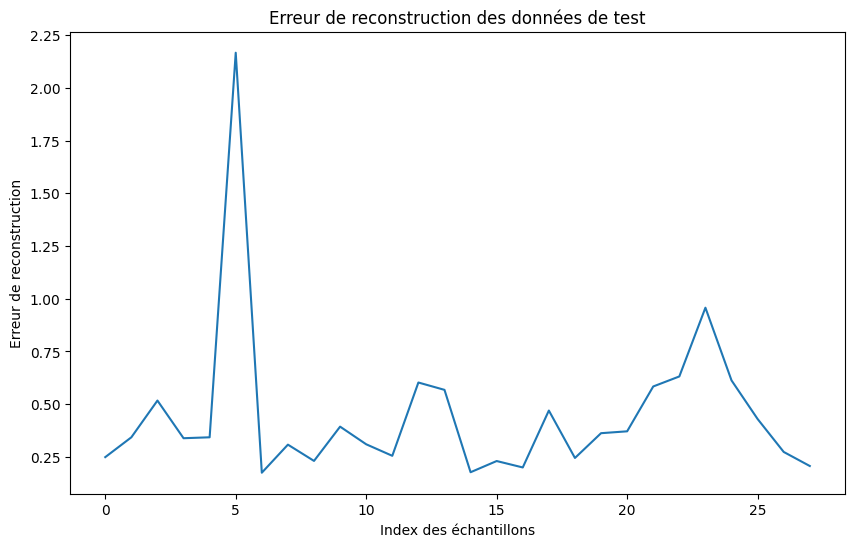

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [7]:
import librosa
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Fonction pour extraire les MFCCs à partir d'un fichier audio
def extract_mfcc(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Charger l'audio
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        return np.mean(mfccs, axis=1)  # Retourner la moyenne des MFCCs
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Arterial_side'  # Remplacer ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs MFCCs
audio_files = []
mfccs_list = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mfcc = extract_mfcc(audio_file)
            if mfcc is not None:
                mfccs_list.append(mfcc)

# Convertir les MFCCs extraits en un tableau numpy
X = np.array(mfccs_list)

# Normalisation des MFCCs avant d'appliquer le clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalisation des MFCCs extraits

# Séparation des données en train, validation et test (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, np.zeros(X_scaled.shape[0]), test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Création de l'autoencodeur
input_dim = X_train.shape[1]  # Nombre de MFCCs extraits (13 MFCCs)

# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)  # Représentation compacte

# Décodeur
decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)  # Reconstruction des MFCCs

# Autoencodeur
autoencoder = Model(input_layer, decoded)

# Compile le modèle
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner l'autoencodeur sur les données d'entraînement (X_train)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_val, X_val))

# Prédire la reconstruction pour les données de test
reconstructed = autoencoder.predict(X_test)

# Calculer l'erreur de reconstruction
reconstruction_error = np.mean(np.abs(X_test - reconstructed), axis=1)

# Définir un seuil pour détecter les anomalies (utiliser le 95e percentile comme seuil)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# Affichage des anomalies détectées
print(f"Nombre d'anomalies détectées : {np.sum(anomalies)}")

# Afficher l'erreur de reconstruction pour visualiser les anomalies
plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error)
plt.title("Erreur de reconstruction des données de test")
plt.xlabel("Index des échantillons")
plt.ylabel("Erreur de reconstruction")
plt.show()

# Affichage des clusters après l'entraînement de l'autoencodeur
# Utiliser la sortie de l'encodeur pour le clustering
encoded_X = autoencoder.predict(X_scaled)


** VAE **

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt

# Fonction pour extraire les MFCCs à partir d'un fichier audio
def extract_mfcc(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Charger l'audio
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        return np.mean(mfccs, axis=1)  # Retourner la moyenne des MFCCs
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Arterial_side'  # Remplacer ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs MFCCs
audio_files = []
mfccs_list = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mfcc = extract_mfcc(audio_file)
            if mfcc is not None:
                mfccs_list.append(mfcc)

# Convertir les MFCCs extraits en un tableau numpy
X = np.array(mfccs_list)

# Normalisation des MFCCs avant d'appliquer le VAE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en train, validation et test (80% train, 10% validation, 10% test)
X_train, X_temp = train_test_split(X_scaled, test_size=0.2, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]}")
print(f"Taille du jeu de validation : {X_val.shape[0]}")
print(f"Taille du jeu de test : {X_test.shape[0]}")


Taille du jeu d'entraînement : 221
Taille du jeu de validation : 28
Taille du jeu de test : 28


code avec tf.function 

Taille du jeu d'entraînement : 221
Taille du jeu de validation : 28
Taille du jeu de test : 28
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.0632 - loss: 1.2706 - mae: 0.8461 - val_accuracy: 0.2143 - val_loss: 1.0848 - val_mae: 0.7897
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1739 - loss: 1.2711 - mae: 0.8419 - val_accuracy: 0.2143 - val_loss: 0.9667 - val_mae: 0.7545
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1810 - loss: 1.0643 - mae: 0.7708 - val_accuracy: 0.2143 - val_loss: 0.8470 - val_mae: 0.7121
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1699 - loss: 0.9135 - mae: 0.7119 - val_accuracy: 0.1429 - val_loss: 0.8195 - val_mae: 0.7015
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2057 - loss: 0.9115 - mae: 0.6971 - val_accuracy: 0.1786 - val_loss: 0.8019 - val_mae: 0.6930
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2228 - loss: 0.8835 - mae: 0.6906 - val_accuracy: 0

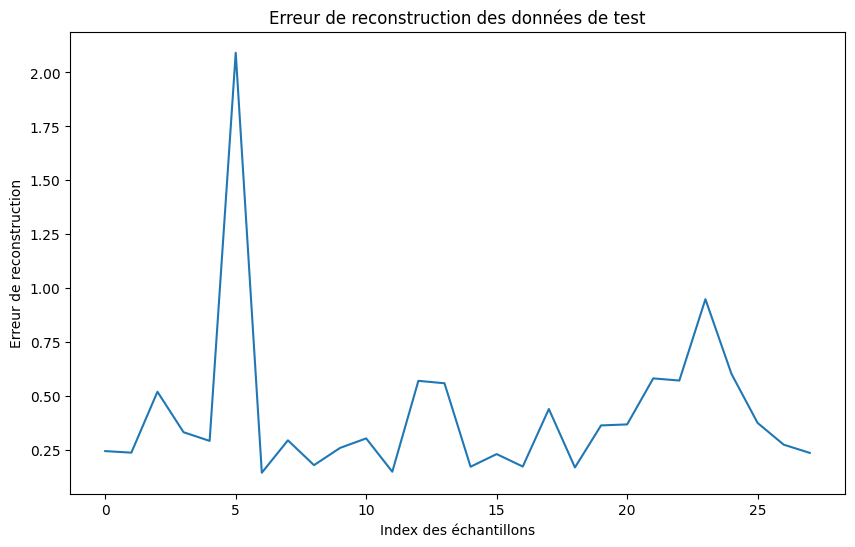

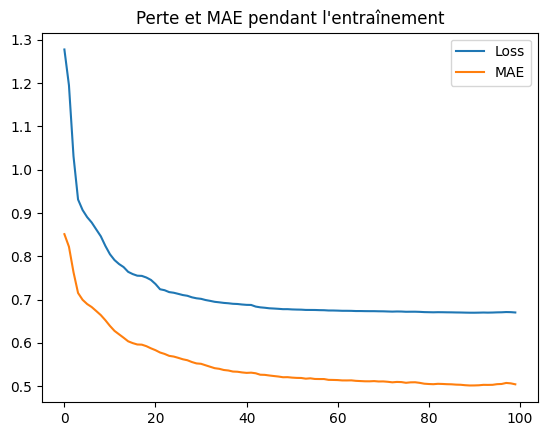

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt

# Fonction pour extraire les MFCCs d'un fichier audio
def extract_mfcc(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Charger l'audio
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        return np.mean(mfccs, axis=1)  # Retourner la moyenne des MFCCs
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Arterial_side'  # Remplacer ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs MFCCs
audio_files = []
mfccs_list = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mfcc = extract_mfcc(audio_file)
            if mfcc is not None:
                mfccs_list.append(mfcc)

# Convertir les MFCCs extraits en un tableau numpy
X = np.array(mfccs_list)

# Normalisation des MFCCs avant d'appliquer l'Autoencoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données en train, validation et test (80% train, 10% validation, 10% test)
X_train, X_temp = train_test_split(X_scaled, test_size=0.2, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

print(f"Taille du jeu d'entraînement : {X_train.shape[0]}")
print(f"Taille du jeu de validation : {X_val.shape[0]}")
print(f"Taille du jeu de test : {X_test.shape[0]}")

# Paramètres
input_dim = X_train.shape[1]  # Nombre de MFCCs extraits (13 MFCCs)
latent_dim = 2  # Dimension de l'espace latent (ici on choisit 2 pour la simplicité)

# Construction de l'Autoencoder plus complexe
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
output_layer = layers.Dense(input_dim, activation='sigmoid')(decoded)

# Création du modèle
autoencoder = Model(input_layer, output_layer)

# Compiler le modèle avec des métriques
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae', 'accuracy'])

# Entraîner l'Autoencoder sur les données d'entraînement
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, validation_data=(X_val, X_val))

# Prédire la reconstruction pour les données de test
reconstructed = autoencoder.predict(X_test)

# Calculer l'erreur de reconstruction
reconstruction_error = np.mean(np.abs(X_test - reconstructed), axis=1)

# Définir un seuil pour détecter les anomalies (utiliser le 95e percentile comme seuil)
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold

# Affichage des anomalies détectées
print(f"Nombre d'anomalies détectées : {np.sum(anomalies)}")

# Visualisation de l'erreur de reconstruction
plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error)
plt.title("Erreur de reconstruction des données de test")
plt.xlabel("Index des échantillons")
plt.ylabel("Erreur de reconstruction")
plt.show()

# Affichage des courbes de perte et MAE pendant l'entraînement
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['mae'], label='MAE')
plt.legend()
plt.title('Perte et MAE pendant l\'entraînement')
plt.show()


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 1.3538 - val_loss: 1.1305
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3186 - val_loss: 1.0984
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3375 - val_loss: 1.0502
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0724 - val_loss: 0.9883
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0578 - val_loss: 0.9277
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0217 - val_loss: 0.8842
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9432 - val_loss: 0.8544
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8669 - val_loss: 0.8312
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8625 - val_loss: 0.8116
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8967 - val_loss: 0.7946
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8732 - val_loss: 0.7793
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7930 - val_los

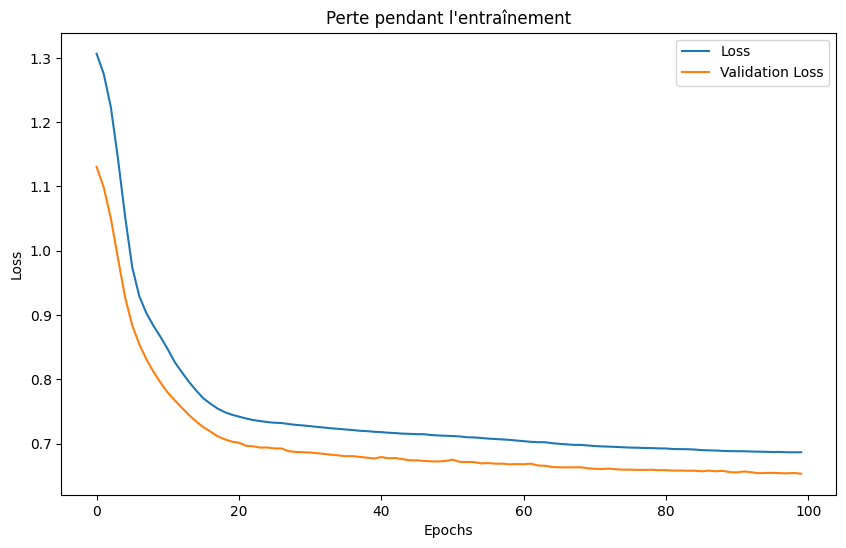

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/stepWARNING:tensorflow:6 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000227F38E48B0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Seuil d'anomalie : 1.0954704284667969
Nombre d'anomalies détectées : 3


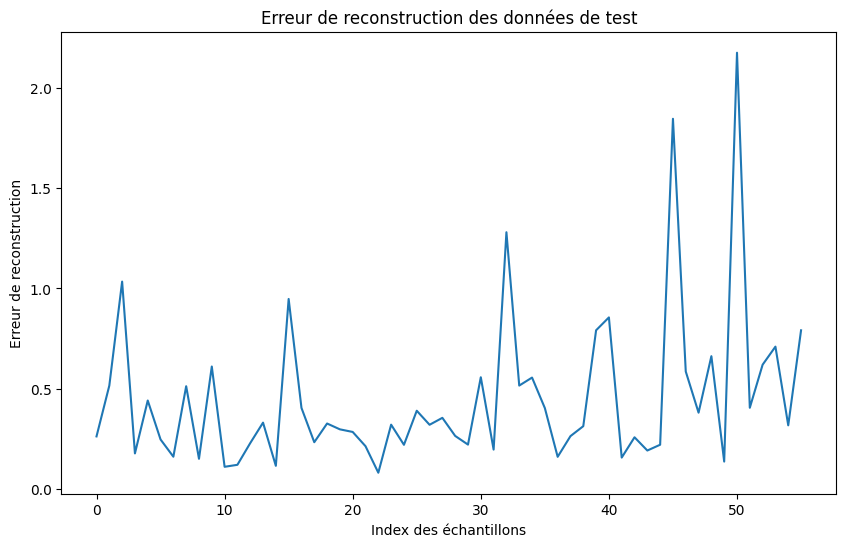

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import librosa
import os
import matplotlib.pyplot as plt

# Fonction pour extraire les MFCCs à partir d'un fichier audio
def extract_mfcc(audio_file):
    try:
        y, sr = librosa.load(audio_file, sr=None)  # Charger l'audio
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extraire les MFCCs
        return np.mean(mfccs, axis=1)  # Retourner la moyenne des MFCCs
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Arterial_side'  # Remplace ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs MFCCs
audio_files = []
mfccs_list = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mfcc = extract_mfcc(audio_file)
            if mfcc is not None:
                mfccs_list.append(mfcc)

# Convertir les MFCCs extraits en un tableau numpy
X = np.array(mfccs_list)

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en train, validation, et test
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)
X_train, X_val = train_test_split(X_train, test_size=0.1, random_state=42)

# Définir l'autoencoder avec plusieurs couches
input_dim = X_train.shape[1]
encoding_dim = 8  # Réduction de la dimension à 8, ajuster selon les performances
latent_dim = 2  # Latent space dimension

# Modèle de l'autoencoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Entraîner le modèle
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_val, X_val))

# Afficher les courbes de perte pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prédire les reconstructions sur l'ensemble de test
X_reconstructed = autoencoder.predict(X_test)

# Calculer l'erreur de reconstruction (différence entre entrée et reconstruction)
reconstruction_error = np.mean(np.abs(X_test - X_reconstructed), axis=1)

# Définir un seuil d'anomalie
threshold = np.percentile(reconstruction_error, 95)  # Seuil à 95% de la distribution des erreurs
print(f"Seuil d'anomalie : {threshold}")

# Détecter les anomalies
anomalies = reconstruction_error > threshold
print(f"Nombre d'anomalies détectées : {np.sum(anomalies)}")

# Visualisation de l'erreur de reconstruction des données de test
plt.figure(figsize=(10, 6))
plt.plot(reconstruction_error)
plt.title('Erreur de reconstruction des données de test')
plt.xlabel('Index des échantillons')
plt.ylabel('Erreur de reconstruction')
plt.show()


(555, 128, 128, 3)
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 112s 1us/step
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 669ms/step - accuracy: 0.5381 - loss: 0.7707 - val_accuracy: 0.4889 - val_loss: 0.6988 - learning_rate: 1.0000e-04
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - accuracy: 0.4497 - loss: 0.7654 - val_accuracy: 0.5556 - val_loss: 0.6802 - learning_rate: 1.0000e-04
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.5462 - loss: 0.7131 - val_accuracy: 0.4889 - val_loss: 0.6793 - learning_rate: 1.0000e-04
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 577ms/step - accuracy: 0.5120 - loss: 0.7368 - val_accuracy: 0.4889 - val_loss: 0.6787 - learning_rate: 1.0000e-04
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 587ms/step - accuracy: 0.5313 - loss: 0.7025 - val_accuracy: 0.4889 - val_loss: 0.6768 - learning_rate: 1.0000e-04
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 546ms/step - accuracy: 0.4959 - loss: 0.7199 - val_accuracy: 0.4889 - val_loss: 0.6752 - learning_rate: 1.

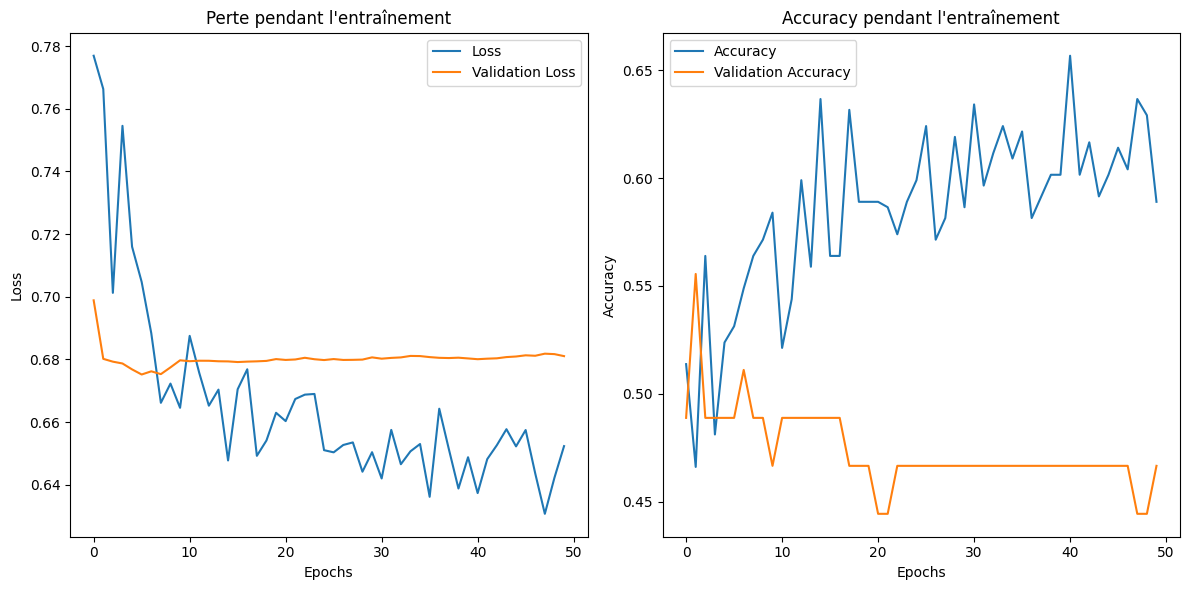

4/4 - 2s - 478ms/step - accuracy: 0.6036 - loss: 0.6733
Test accuracy: 0.6036
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 795ms/step
Accuracy: 0.6036
Precision: 0.5375
Recall: 0.8600
F1-score: 0.6615


In [41]:
import numpy as np
import os
import librosa
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import LearningRateScheduler

# Fonction pour extraire le Mel-spectrogramme à partir d'un fichier audio
def extract_mel_spectrogram(audio_file, n_mels=128, hop_length=512):
    try:
        y, sr = librosa.load(audio_file, sr=None)
        # Convertir en Mel-spectrogramme
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=hop_length)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # Conversion en décibels
        return mel_spec_db
    except Exception as e:
        print(f"Erreur lors du traitement de {audio_file}: {e}")
        return None

# Définir le chemin vers ton dossier "objectif2" contenant "artère" et "veine"
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2'  # Remplacer ce chemin par ton chemin réel

# Liste pour stocker les fichiers audio et leurs Mel-spectrogrammes
audio_files = []
mel_spectrograms = []
labels = []

# Parcourir les sous-dossiers dans 'objectif2' pour lire les fichiers audio
for subdir, dirs, files in os.walk(root_folder):
    for file in files:
        if file.endswith('.wav'):
            audio_file = os.path.join(subdir, file)
            audio_files.append(audio_file)
            mel_spec = extract_mel_spectrogram(audio_file)
            if mel_spec is not None:
                mel_spectrograms.append(mel_spec)
                # Ajouter un label basé sur le sous-dossier (Anomalie vs Normal)
                label = 0 if "Arterial_side" in subdir else 1  # 0 : normal, 1 : anomalie
                labels.append(label)

# Redimensionner les spectrogrammes à une taille uniforme (par exemple 128x128)
max_length = 128  # Longueur souhaitée pour tous les spectrogrammes
X_resized = []

# Compléter ou tronquer les spectrogrammes
for spec in mel_spectrograms:
    # Tronquer ou compléter chaque spectrogramme à la taille fixée
    if spec.shape[1] > max_length:
        spec = spec[:, :max_length]  # Tronquer
    elif spec.shape[1] < max_length:
        pad_width = max_length - spec.shape[1]
        spec = np.pad(spec, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)  # Compléter
    X_resized.append(spec)

# Convertir la liste en un tableau numpy
X_resized = np.array(X_resized)

# Normalisation des données (les valeurs des pixels des spectrogrammes)
X_scaled = X_resized / np.max(X_resized)

# Ajouter une dimension pour les canaux (nécessaire pour les CNN)
# Répliquer le spectrogramme en 3 canaux
X_scaled = np.expand_dims(X_scaled, axis=-1)  # Ajouter une dimension pour un canal (1 canal)

# Répliquer cette dimension pour avoir 3 canaux
X_scaled = np.repeat(X_scaled, 3, axis=-1)  # Répliquer sur 3 canaux

# Vérifier la forme de X_scaled
print(X_scaled.shape)  # Cela doit afficher (n_samples, n_mels, n_frames, 3)

# Convertir les labels en array numpy
y = np.array(labels)

# Diviser les données en train, validation et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Utiliser ResNet50 comme modèle de base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(X_train.shape[1], X_train.shape[2], 3))  # 3 canaux
base_model.trainable = False  # Geler les poids du modèle de base

# Définir l'architecture du CNN avec ResNet50 comme extracteur de caractéristiques
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Sortie binaire : normal ou anomalie

# Compiler le modèle avec un optimiseur et une fonction de perte appropriée
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle avec les mêmes données
def lr_schedule(epoch):
    if epoch < 10:
        return 1e-4
    else:
        return 1e-5

callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

# Afficher les courbes de perte et d'accuracy
plt.figure(figsize=(12, 6))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Prédire les anomalies sur le jeu de test
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Seuil à 0.5 pour classer comme normal ou anomalie

# Calculer les métriques de classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 567ms/step - accuracy: 0.5339 - loss: 0.7806 - val_accuracy: 0.5111 - val_loss: 0.7134
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 501ms/step - accuracy: 0.4830 - loss: 0.7755 - val_accuracy: 0.4222 - val_loss: 0.6998
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step - accuracy: 0.4949 - loss: 0.7528 - val_accuracy: 0.4444 - val_loss: 0.6962
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 533ms/step - accuracy: 0.5746 - loss: 0.6972 - val_accuracy: 0.4667 - val_loss: 0.6938
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 528ms/step - accuracy: 0.5736 - loss: 0.6875 - val_accuracy: 0.4667 - val_loss: 0.6897
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 527ms/step - accuracy: 0.5659 - loss: 0.6778 - val_accuracy: 0.5111 - val_loss: 0.6891
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 528ms/step - accuracy: 0.5314 - loss: 0.7015 - val_accuracy: 0.4667 - val_loss: 0.6923
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 526ms/step - accuracy: 0.5782 - loss: 0.6830 - val_accuracy: 0

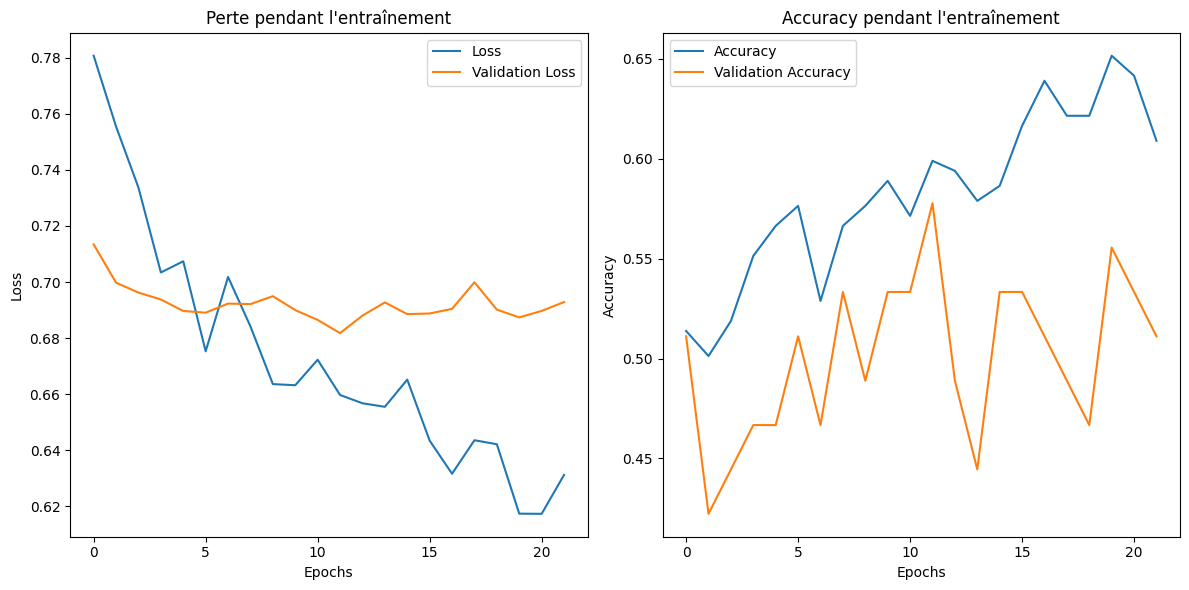

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 933ms/step - accuracy: 0.5443 - loss: 0.7437 - val_accuracy: 0.6000 - val_loss: 0.6815
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 834ms/step - accuracy: 0.7017 - loss: 0.5676 - val_accuracy: 0.5778 - val_loss: 0.6826
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 830ms/step - accuracy: 0.7355 - loss: 0.5289 - val_accuracy: 0.6222 - val_loss: 0.6858
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 820ms/step - accuracy: 0.7506 - loss: 0.4746 - val_accuracy: 0.6222 - val_loss: 0.6861
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 825ms/step - accuracy: 0.8526 - loss: 0.3719 - val_accuracy: 0.6000 - val_loss: 0.6896
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 814ms/step - accuracy: 0.8954 - loss: 0.3316 - val_accuracy: 0.6000 - val_loss: 0.6907
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 812ms/step - accuracy: 0.9074 - loss: 0.3195 - val_accuracy: 0.6222 - val_loss: 0.6893
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 811ms/step - accuracy: 0.9196 - loss: 0.2747 - val_accu

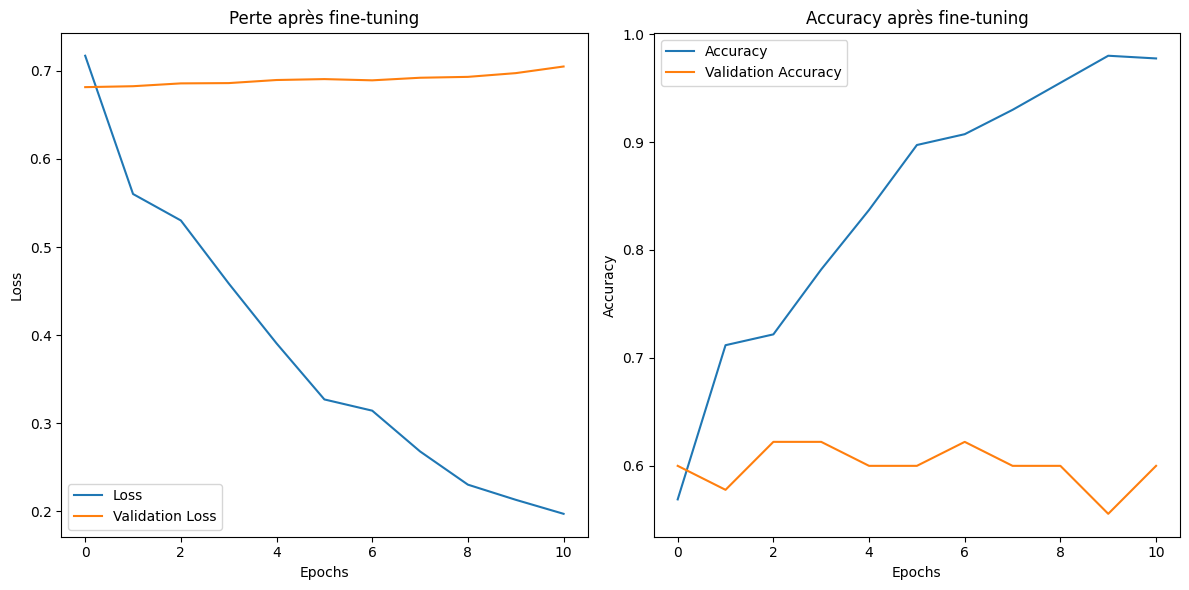

4/4 - 2s - 426ms/step - accuracy: 0.6577 - loss: 0.6565
Test accuracy after fine-tuning: 0.6577
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 865ms/step
Precision: 0.6154
Recall: 0.6400
F1-score: 0.6275


In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Activer l'exécution immédiate si elle n'est pas déjà activée
if not tf.executing_eagerly():
    tf.compat.v1.enable_eager_execution()

# Utiliser ResNet50 comme modèle de base
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))  # 3 canaux pour les images RGB
base_model.trainable = False  # Geler les poids du modèle de base

# Définir l'architecture du CNN avec ResNet50 comme extracteur de caractéristiques
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Sortie binaire : normal ou anomalie

# Compiler le modèle avec un optimiseur et une fonction de perte appropriée
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Ajouter un callback pour l'arrêt précoce (early stopping)
callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]

# Entraîner le modèle avec les couches de ResNet50 gelées
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

# Afficher les courbes de perte et d'accuracy pendant l'entraînement
plt.figure(figsize=(12, 6))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Déverrouiller les dernières couches de ResNet50 pour fine-tuning
base_model.trainable = True
# On gèle les couches jusqu'à la couche 143 (qui est avant les couches finales de ResNet50)
for layer in base_model.layers[:143]:
    layer.trainable = False

# Recompiler le modèle après le fine-tuning
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Ré-entraîner le modèle avec les couches dégelées
history_fine_tuning = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

# Afficher les courbes de perte et d'accuracy après fine-tuning
plt.figure(figsize=(12, 6))

# Perte
plt.subplot(1, 2, 1)
plt.plot(history_fine_tuning.history['loss'], label='Loss')
plt.plot(history_fine_tuning.history['val_loss'], label='Validation Loss')
plt.title('Perte après fine-tuning')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_fine_tuning.history['accuracy'], label='Accuracy')
plt.plot(history_fine_tuning.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy après fine-tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy after fine-tuning: {test_acc:.4f}")

# Affichage de la précision, rappel et F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convertir les probabilités en labels binaires (0 ou 1)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Random Forest 
apres labelisation de l'arterial side 


In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Charger les données
df = pd.read_csv("C:/Users/Amina/Desktop/cours/projet/arterial_side_with_clusters.csv")  # adapte le chemin

X = df[[col for col in df.columns if col.startswith("mfcc")]]
y = df["cluster"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entraîner modèle
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.89      0.91        27
           1       0.90      0.93      0.92        29

    accuracy                           0.91        56
   macro avg       0.91      0.91      0.91        56
weighted avg       0.91      0.91      0.91        56



meilleur model pour l'arterial side !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


la cellule d'en bas 

In [23]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📁 Chemins
CSV_PATH = "C:/Users/Amina/Desktop/cours/projet/arterial_side_with_clusters.csv"
IMG_DIR = "C:/Users/Amina/Desktop/cours/projet/spectrograms"

# 📊 Charger les labels
df = pd.read_csv(CSV_PATH)
df['filename'] = df['audio_file'].apply(lambda x: os.path.basename(x).replace('.wav', '.png'))
df['label'] = df['cluster'].astype(str)

# 🔁 Data augmentation + préprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    brightness_range=[0.8, 1.2]
)

train_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="filename",
    y_col="label",
    subset="training",
    target_size=(256, 256),
    batch_size=16,
    class_mode="binary"
)

val_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="filename",
    y_col="label",
    subset="validation",
    target_size=(256, 256),
    batch_size=16,
    class_mode="binary"
)

# 🔧 MobileNetV2 + fine-tuning
base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = True

# On ne dégèle que les 20 dernières couches
for layer in base_model.layers[:-20]:
    layer.trainable = False

# 🧠 Tête personnalisée
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 📉 Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_accuracy', verbose=1)
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1)

# 🚀 Entraînement
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stop, lr_schedule]
)


Found 222 validated image filenames belonging to 2 classes.
Found 55 validated image filenames belonging to 2 classes.


C:\Users\Amina\AppData\Local\Temp\ipykernel_15292\2099741972.py:54: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
c:\Users\Amina\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 621ms/step - accuracy: 0.4292 - loss: 0.8154 - val_accuracy: 0.1455 - val_loss: 0.8318 - learning_rate: 1.0000e-04
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 561ms/step - accuracy: 0.6142 - loss: 0.6389 - val_accuracy: 0.3636 - val_loss: 0.7463 - learning_rate: 1.0000e-04
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 598ms/step - accuracy: 0.6555 - loss: 0.6017 - val_accuracy: 0.4727 - val_loss: 0.7082 - learning_rate: 1.0000e-04
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 592ms/step - accuracy: 0.6009 - loss: 0.6400 - val_accuracy: 0.6364 - val_loss: 0.6391 - learning_rate: 1.0000e-04
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 589ms/step - accuracy: 0.6345 - loss: 0.6227 - val_accuracy: 0.7455 - val_loss: 0.5810 - learning_rate: 1.0000e-04
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 586ms/step - accuracy: 0.7356 - loss: 0.5929 - val_accuracy: 0.8364 - val_loss: 0.5816 - learning_rate: 1.0000e-04
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 584ms/step - accuracy:

Excellent travail 👏 ! Tu viens de faire un entraînement réussi avec :

📈 Résultats :
Accuracy validation finale : 92.7%

Loss validation descendante et stable

Le modèle s’est arrêté automatiquement (early stopping) à l’epoch 18, en revenant au meilleur état (epoch 13).

Cela signifie que ton modèle MobileNetV2 est bien entraîné et prêt pour la prédiction de sténose à partir d’un audio spectrogramme 🎯

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 📄 Charger le CSV
csv_path = "/content/arterial_side_with_clusters.csv"  # adapte si besoin
df = pd.read_csv(csv_path)

# 📁 Dossier d'export
output_dir = "C:/Users/Amina/Desktop/cours/projet/spectrograms"
os.makedirs(output_dir, exist_ok=True)

# 🔁 Génération des spectrogrammes pour chaque audio du CSV
for i, row in df.iterrows():
    wav_path = row['audio_file']
    output_file = os.path.basename(wav_path).replace('.wav', '.png')
    output_path = os.path.join(output_dir, output_file)

    try:
        y, sr = librosa.load(wav_path, sr=22050)
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S_dB = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(2.56, 2.56), dpi=100)
        librosa.display.specshow(S_dB, sr=sr, cmap='magma')
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"❌ Erreur pour {wav_path} : {e}")


✅ 278 fichiers traités, shape des features : (278, 26)
📁 Fichier sauvegardé ici : C:/Users/Amina/Desktop/cours/projet/vein_side_with_clusters.csv


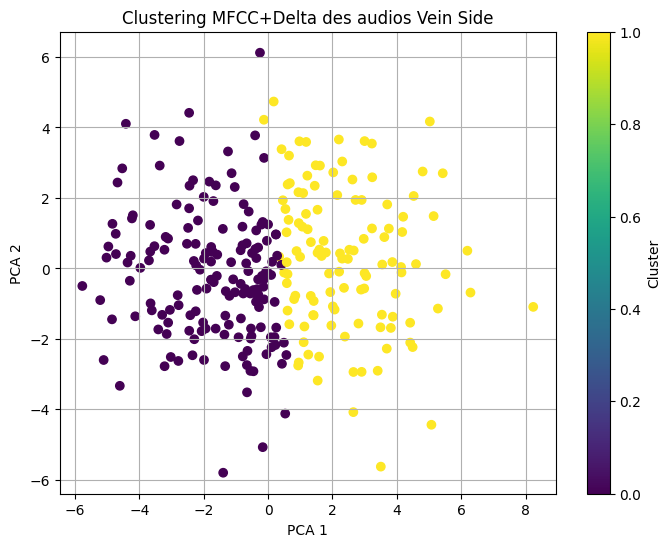

In [36]:
import librosa
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 📁 Dossier audio
root_folder = 'C:/Users/Amina/Desktop/cours/projet/objectif2/Vein_side'

# 📊 Extraction MFCCs + delta
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, sr=22050)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        delta = librosa.feature.delta(mfcc)
        features = np.concatenate([np.mean(mfcc, axis=1), np.mean(delta, axis=1)])
        return features
    except Exception as e:
        print(f"❌ Erreur sur {audio_path} : {e}")
        return None

# 🔁 Collecte
features_list = []
files_list = []

for file in os.listdir(root_folder):
    if file.endswith(".wav"):
        full_path = os.path.join(root_folder, file)
        features = extract_features(full_path)
        if features is not None:
            features_list.append(features)
            files_list.append(full_path)

X = np.array(features_list)
print(f"✅ {len(files_list)} fichiers traités, shape des features : {X.shape}")

# 🧼 Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔍 PCA pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 🔗 KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 📄 DataFrame final
df = pd.DataFrame(X, columns=[f"mfcc_{i+1}" for i in range(13)] + [f"delta_{i+1}" for i in range(13)])
df["audio_file"] = files_list
df["cluster"] = clusters

# 💾 Sauvegarde CSV
output_path = "C:/Users/Amina/Desktop/cours/projet/vein_side_with_clusters.csv"
df.to_csv(output_path, index=False)
print(f"📁 Fichier sauvegardé ici : {output_path}")

# 📊 Visualisation
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Clustering MFCC+Delta des audios Vein Side")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


Moyenne des MFCCs pour le Cluster 0 : [ 0.3663852   0.65209496 -0.08120196 -0.62148064 -0.7842569  -0.787614
 -0.72336936 -0.7150229  -0.8080182  -0.79202545 -0.72393763 -0.6486736
 -0.6178347  -0.02379994 -0.04503298  0.12476159  0.13030165  0.07022697
 -0.04615652 -0.13709065 -0.10082693 -0.09268329 -0.11565854 -0.17563
 -0.1883264  -0.2330789 ]


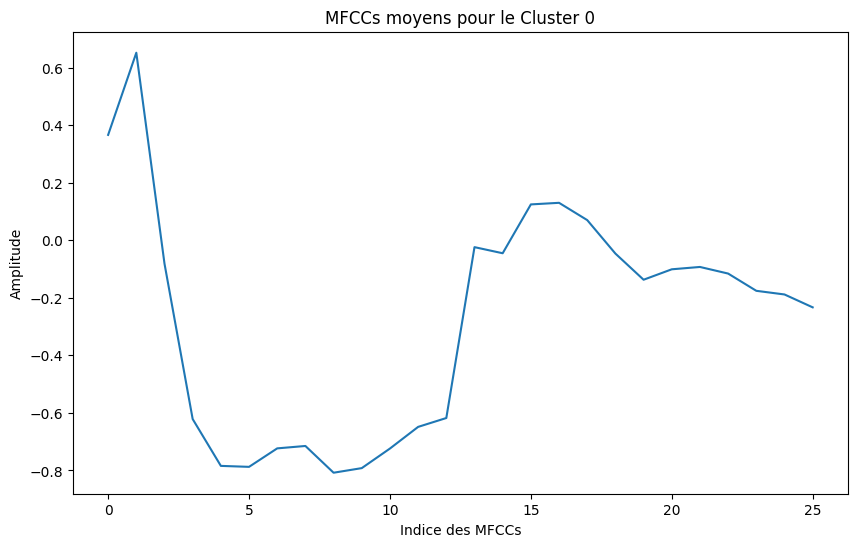

Moyenne des MFCCs pour le Cluster 1 : [-0.22237249 -0.3957801   0.04928441  0.3771992   0.47599396  0.47803158
  0.43903932  0.4339733   0.49041563  0.48070905  0.4393841   0.3937038
  0.37498647  0.01444507  0.02733213 -0.07572237 -0.07908484 -0.04262332
  0.02801408  0.08320533  0.06119554  0.05625286  0.0701974   0.10659624
  0.11430211  0.14146404]


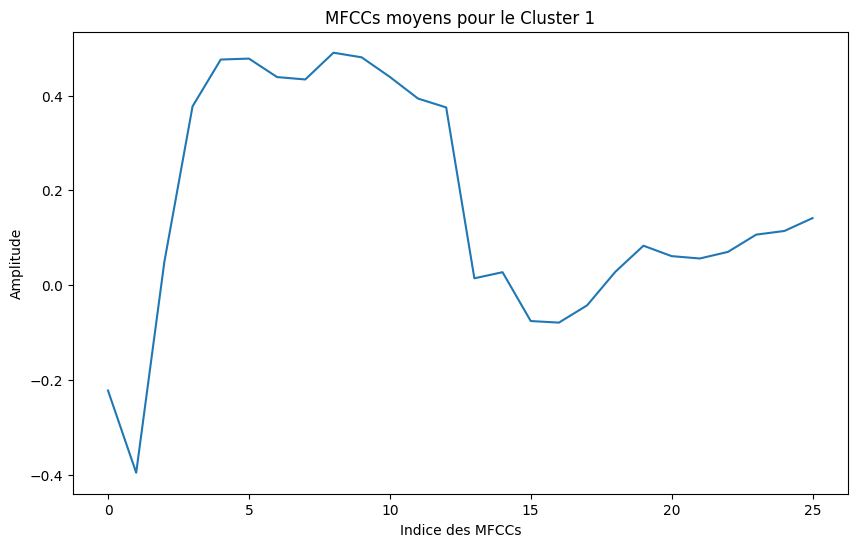

In [37]:
# Calcul des MFCCs moyens pour chaque cluster
for i in range(2):  # On a deux clusters
    cluster_mfccs = X_scaled[labels_kmeans == i]  # Sélectionner les MFCCs du cluster i
    mean_mfcc = np.mean(cluster_mfccs, axis=0)  # Calculer la moyenne des MFCCs pour ce cluster
    print(f"Moyenne des MFCCs pour le Cluster {i} : {mean_mfcc}")
    
    # Afficher les MFCCs moyens pour chaque cluster
    plt.figure(figsize=(10, 6))
    plt.plot(mean_mfcc)
    plt.title(f"MFCCs moyens pour le Cluster {i}")
    plt.xlabel("Indice des MFCCs")
    plt.ylabel("Amplitude")
    plt.show()


 Interprétation physiologique (basée sur littérature audio-médicale) :
Un flux sanguin normal est plus régulier, sans turbulence → MFCCs lissés, moins extrêmes → Cluster 1

Un flux avec sténose (obstruction partielle) génère des turbulences → signatures acoustiques plus marquées et irrégulières → Cluster 0

✅ Conclusion :
🟢 Cluster 1 = Flux sanguin veineux normal

🔴 Cluster 0 = Présence probable de sténose veineuse

In [28]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 📂 Dossier des fichiers audio veineux
vein_audio_dir = "C:/Users/Amina/Desktop/cours/projet/objectif2/Vein_side"

# 📂 Dossier de sortie des images de spectrogrammes
vein_spectrogram_dir = "C:/Users/Amina/Desktop/cours/projet/vein_spectrograms"
os.makedirs(vein_spectrogram_dir, exist_ok=True)

# 🔁 Génération des spectrogrammes
for file in os.listdir(vein_audio_dir):
    if file.endswith('.wav'):
        try:
            audio_path = os.path.join(vein_audio_dir, file)
            y, sr = librosa.load(audio_path, sr=22050)
            S = librosa.feature.melspectrogram(y=y, sr=sr)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # 🎨 Création et sauvegarde de l'image
            plt.figure(figsize=(2.56, 2.56), dpi=100)
            librosa.display.specshow(S_dB, sr=sr, cmap='magma')
            plt.axis('off')
            plt.tight_layout()
            output_path = os.path.join(vein_spectrogram_dir, file.replace(".wav", ".png"))
            plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
            plt.close()
        except Exception as e:
            print(f"Erreur pour {file} : {e}")


In [73]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import os

# 📂 1. Load the labels and spectrograms paths
df = pd.read_csv("/mnt/data/vein_spectrograms_labels.csv")  # Path to your CSV file with labels
df["filename"] = df["filename"].apply(lambda x: os.path.basename(x))  # Get the filename from the path
df["label"] = df["label"].astype(str)  # Ensure labels are strings

# 📂 2. Set up the directory paths
IMG_DIR = "/mnt/data/vein_spectrograms"  # Path to your spectrograms directory

# 🔁 3. Preprocess the data with ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Load the training data
train_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="filename",
    y_col="label",
    target_size=(224, 224),  # Resize spectrograms to 224x224
    batch_size=32,
    class_mode="binary",
    subset="training"
)

# Load the validation data
val_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="filename",
    y_col="label",
    target_size=(224, 224),  # Resize spectrograms to 224x224
    batch_size=32,
    class_mode="binary",
    subset="validation"
)

# 📄 4. Model setup: Use VGG16 as a base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))  # VGG16 as feature extractor
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add global average pooling to reduce the dimensionality
x = Dropout(0.5)(x)  # Dropout for regularization
x = Dense(128, activation="relu")(x)  # Dense layer
x = Dropout(0.5)(x)  # Dropout for regularization
output = Dense(1, activation="sigmoid")(x)  # Output layer for binary classification

# 🧠 Build the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# 📈 Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 🚀 5. Train the model
early_stop = EarlyStopping(patience=6, restore_best_weights=True, monitor='val_accuracy')
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[early_stop, lr_schedule]
)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/vein_spectrograms_labels.csv'

In [39]:
import os

csv_filenames = set(df["filename"].tolist())
actual_files = set(os.listdir("C:/Users/Amina/Desktop/cours/projet/vein_spectrograms"))

missing = csv_filenames - actual_files
print(f"🧨 Fichiers manquants dans le dossier images : {list(missing)[:5]}")
print(f"🎯 Nombre de fichiers réellement présents : {len(actual_files)}")
print(f"📄 Nombre dans le CSV : {len(csv_filenames)}")


🧨 Fichiers manquants dans le dossier images : ['Vein_side\\20200323_050531.png', 'Vein_side\\20200531_072911.png', 'Vein_side\\20200204_045209.png', 'Vein_side\\20200118_045339.png', 'Vein_side\\20190928_053606.png']
🎯 Nombre de fichiers réellement présents : 278
📄 Nombre dans le CSV : 278


In [49]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 📂 Chemin vers les spectrogrammes
IMG_DIR = "C:/Users/Amina/Desktop/cours/projet/vein_spectrograms"
CSV_PATH = "C:/Users/Amina/Desktop/cours/projet/vein_spectrograms_labels.csv"  # Le fichier CSV des labels

# 📊 Charger le fichier CSV et convertir les labels en chaînes de caractères
df = pd.read_csv(CSV_PATH)
df['label'] = df['label'].astype(str)  # Convertir les labels en chaînes de caractères

# Paramètres d'entrée (si tu veux utiliser 226x226)
input_shape = (226, 226, 3)  # Résolution de l'image (3 canaux pour RGB)

# 🔁 Prétraitement des données
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="filename",
    y_col="label",
    target_size=(226, 226),  # S'assurer que les images sont redimensionnées à 226x226
    batch_size=16,
    subset="training",
    class_mode="binary"
)

val_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="filename",
    y_col="label",
    target_size=(226, 226),  # Même redimensionnement
    batch_size=16,
    subset="validation",
    class_mode="binary"
)

# 🧠 Architecture du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sortie binaire (normal ou sténose)
])

# 💡 Compilation du modèle
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# 🚀 Entraînement
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.


c:\Users\Amina\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 278 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
c:\Users\Amina\venv\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 278 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
c:\Users\Amina\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Amina\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessi

ValueError: The PyDataset has length 0

In [53]:
import os
import pandas as pd

# Définir le chemin du dossier d'images
IMG_DIR = "C:/Users/Amina/Desktop/cours/projet/vein_spectrograms"  # Assure-toi que ce chemin est correct

# Charger le CSV contenant les spectrogrammes et leurs labels
df = pd.read_csv("C:/Users/Amina/Desktop/cours/projet/vein_spectrograms_labels.csv")  # Remplace par le chemin correct de ton fichier CSV

# Lister tous les fichiers dans le dossier d'images
existing_files = set(os.listdir(IMG_DIR))

# Vérifier si les fichiers de df existent dans le dossier IMG_DIR
df['file_exists'] = df['filename'].apply(lambda x: x in existing_files)

# Filtrer le DataFrame pour ne garder que les fichiers existants
df_valid = df[df['file_exists'] == True]

# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV
df_valid.to_csv("vein_spectrograms_valid_labels.csv", index=False)

# Afficher un résumé
print(f"Nombre de fichiers valides : {len(df_valid)}")


Nombre de fichiers valides : 0
